In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def simulate_nonhomogeneous_poisson(start, end, mu, mu_max=1):
    
    events = []
    t = start
    while t < end:
        t += np.random.exponential(1 / mu_max)
        if t >= end:
            break
        
        if np.random.uniform(0, 1) < mu(t) / mu_max:
            events.append(t)
    
    return events


def branching_Hawkes_process(intensity, kernel_funct, T):
    t = 0
    poissons = []
    while t<T:
        t+= np.random.exponential(1/intensity)
        if t<T:
            poissons.append(t)
    new_pt = True
    Ti1 = poissons.copy()
    while new_pt:
        new_pt = False
        Ti2 = []
        for pt in Ti1:
            Ti3 = simulate_nonhomogeneous_poisson(pt, T, lambda t: kernel_funct(t-pt), 1)
            if Ti3:
                new_pt = True
                Ti2.extend(Ti3)
        Ti1 = Ti2.copy()
        poissons.extend(Ti2)
    return np.sort(poissons)
            

def exp_kernel(t, alpha = 0.6, beta = 0.8):
    return alpha * np.exp(-beta*np.where(t>0, t, np.inf))

In [17]:
test_Hawkes = branching_Hawkes_process(1.2, exp_kernel, 10)

In [30]:
def plot_Hawkes(events, T, intensity = 1.2, alpha = 0.6, beta = 0.8):
    interval = np.linspace(0, T, 1000)
    values = np.zeros(1000) + intensity
    for event in events:
        values += alpha * np.exp(-beta*np.where(interval - event>0, interval - event, np.inf))
    plt.figure(figsize=(10, 5))
    plt.scatter(events, np.ones(len(events)), color = 'red', label = 'Events')
    plt.plot(interval, values, label = 'Intensity')
    plt.legend()
    plt.show()

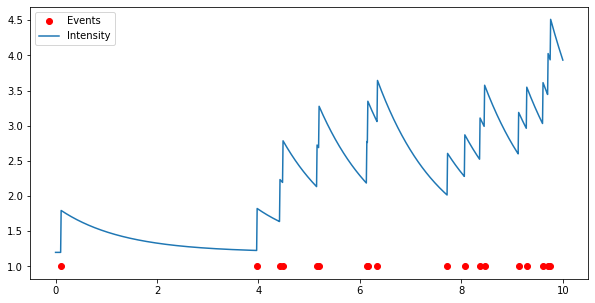

In [31]:
plot_Hawkes(test_Hawkes, 10)